In [464]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

df = pd.read_csv('Airbnb_Open_Data.csv')
df.iloc[13, df.columns.get_loc('neighbourhood group')] = 'Brooklyn'
df.iloc[18, df.columns.get_loc('neighbourhood group')] = 'Manhattan'

df.head()

/var/folders/8q/jzwt9rrs4bz6txvcy6scnyn80000gn/T/ipykernel_80388/485946608.py:8: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [465]:
numeric_columns = df.select_dtypes(include=[np.number])

medians = numeric_columns.median()

df[numeric_columns.columns] = numeric_columns.fillna(medians)

In [466]:
cols = ['price', 'service fee']
for i in cols:
    df[i] = df[i].str.replace('$', '')
    df[i] = df[i].str.replace(',', '')
    df[i] = pd.to_numeric(df[i])

/var/folders/8q/jzwt9rrs4bz6txvcy6scnyn80000gn/T/ipykernel_80388/3619526064.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [467]:
#columns_to_encode = ['neighbourhood group', 'neighbourhood', 'instant_bookable', 'room type',]

# Create a LabelEncoder object
#label_encoder = LabelEncoder()

# Iterate through each column and label encode the values
#for col in columns_to_encode:
    #df[col] = label_encoder.fit_transform(df[col])

In [468]:
df = df.drop(columns = ['id', 'host id'])


In [469]:
df.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,...,124.0,3.0,0.0,NaN,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [470]:
df.corr()

/var/folders/8q/jzwt9rrs4bz6txvcy6scnyn80000gn/T/ipykernel_80388/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
lat,1.000000,0.074348,0.005692,-0.005897,-0.005886,0.014842,-0.025245,-0.021800,-0.003982,0.032357,-0.004960
long,0.074348,1.000000,0.000880,0.003271,0.003118,-0.039502,0.068999,0.116834,0.015265,-0.104034,0.058294
Construction year,0.005692,0.000880,1.000000,-0.003736,-0.003412,-0.000498,0.001835,0.003721,0.004792,-0.002699,-0.008388
price,-0.005897,0.003271,-0.003736,1.000000,0.999991,-0.003434,0.005299,0.004567,-0.004515,-0.000111,-0.002794
service fee,-0.005886,0.003118,-0.003412,0.999991,1.000000,-0.003615,0.005191,0.004445,-0.004329,0.000036,-0.003134
minimum nights,0.014842,-0.039502,-0.000498,-0.003434,-0.003615,1.000000,-0.049860,-0.087013,-0.002093,0.084622,0.058783
number of reviews,-0.025245,0.068999,0.001835,0.005299,0.005191,-0.049860,1.000000,0.601314,-0.018608,-0.080699,0.098399
reviews per month,-0.021800,0.116834,0.003721,0.004567,0.004445,-0.087013,0.601314,1.000000,0.033897,-0.030541,0.071948
review rate number,-0.003982,0.015265,0.004792,-0.004515,-0.004329,-0.002093,-0.018608,0.033897,1.000000,0.024365,-0.006581
calculated host listings count,0.032357,-0.104034,-0.002699,-0.000111,0.000036,0.084622,-0.080699,-0.030541,0.024365,1.000000,0.158876


In [471]:
df[df['neighbourhood group'] == 'manhatan']

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


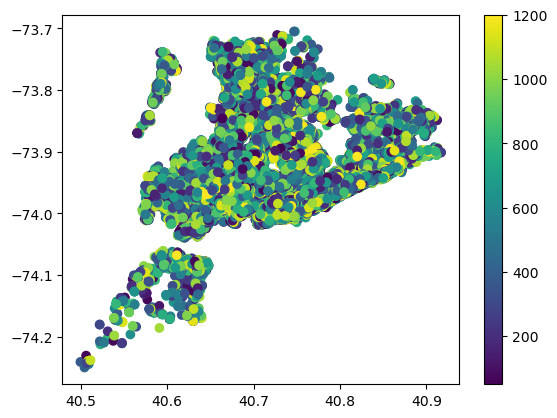

In [472]:
plt.scatter(df['lat'], df['long'], c=df['price'], cmap='viridis')
plt.colorbar()

plt.show()

In [473]:
df[df['neighbourhood group'] == 'Manhattan'].groupby('neighbourhood').agg({'price':'mean'}).reset_index()

,neighbourhood,price
0,Battery Park City,591.059322
1,Chelsea,633.661694
2,Chinatown,629.899619
3,Civic Center,626.121495
4,East Harlem,626.872642
5,East Village,617.528226
6,Financial District,623.579973
7,Flatiron District,613.101266
8,Gramercy,614.959479
9,Greenwich Village,639.806757


In [474]:
avg_price_group = dict()
print(df['neighbourhood group'].unique())

for i in df['neighbourhood group'].unique():
    if not pd.isna(i):
        avg_price_group[i] = df.loc[df['neighbourhood group'] == i, 'price'].mean()
        print(i, avg_price_group[i])


['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']
Brooklyn 626.5610778443114
Manhattan 622.4365084815603
Queens 630.2076469699259
Staten Island 624.4905462184873
Bronx 627.7663585951941


In [475]:
avg_price_Brooklyn = dict()
dfBrook = df[df['neighbourhood group'] == 'Brooklyn']

for i in dfBrook['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_price_Brooklyn[i] = df.loc[df['neighbourhood'] == i, 'price'].mean()

sorted_dict_Brook = dict(sorted(avg_price_Brooklyn.items(), key=lambda item: item[1]))


In [476]:
avg_price_Man = dict()
dfMan = df[df['neighbourhood group'] == 'Manhattan']

for i in dfMan['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_price_Man[i] = df.loc[df['neighbourhood'] == i, 'price'].mean()

sorted_dict_Man = dict(sorted(avg_price_Man.items(), key=lambda item: item[1]))

In [477]:
avg_price_Stat = dict()
dfStat = df[df['neighbourhood group'] == 'Staten Island']

for i in dfStat['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_price_Stat[i] = df.loc[df['neighbourhood'] == i, 'price'].mean()

sorted_dict_Stat = dict(sorted(avg_price_Stat.items(), key=lambda item: item[1]))

In [478]:
avg_price_Queens = dict()
dfQueens = df[df['neighbourhood group'] == 'Queens']

for i in dfQueens['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_price_Queens[i] = df.loc[df['neighbourhood'] == i, 'price'].mean()

sorted_dict_Queens = dict(sorted(avg_price_Queens.items(), key=lambda item: item[1]))

In [479]:
avg_price_Bronx = dict()
dfBronx = df[df['neighbourhood group'] == 'Bronx']

for i in dfBronx['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_price_Bronx[i] = df.loc[df['neighbourhood'] == i, 'price'].mean()

sorted_dict_Bronx = dict(sorted(avg_price_Bronx.items(), key=lambda item: item[1]))

In [480]:
avg_rating_Bronx = dict()
dfBronx = df[df['neighbourhood group'] == 'Bronx']

for i in dfBronx['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_rating_Bronx[i] = df.loc[df['neighbourhood'] == i, 'review rate number'].mean()

sorted_rating_Bronx = dict(sorted(avg_rating_Bronx.items(), key=lambda item: item[1]))

In [481]:
avg_rating_Queens = dict()
dfQueens = df[df['neighbourhood group'] == 'Queens']

for i in dfQueens['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_rating_Queens[i] = df.loc[df['neighbourhood'] == i, 'review rate number'].mean()

sorted_rating_Queens = dict(sorted(avg_rating_Queens.items(), key=lambda item: item[1]))

In [482]:
avg_rating_Stat = dict()
dfStat = df[df['neighbourhood group'] == 'Staten Island']

for i in dfStat['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_rating_Stat[i] = df.loc[df['neighbourhood'] == i, 'review rate number'].mean()

sorted_rating_Stat = dict(sorted(avg_rating_Stat.items(), key=lambda item: item[1]))

In [483]:
avg_rating_Man = dict()
dfMan = df[df['neighbourhood group'] == 'Manhattan']

for i in dfMan['neighbourhood'].unique():
    if not pd.isna(i):
        if len(df[df['neighbourhood'] == i]) > 9:
            avg_rating_Man[i] = df.loc[df['neighbourhood'] == i, 'review rate number'].mean()

sorted_rating_Man = dict(sorted(avg_rating_Man.items(), key=lambda item: item[1]))

In [484]:

len(df[df['neighbourhood'] == 'Chelsea'])

2285

In [485]:
sorted_med = dict(sorted(med_price.items(), key=lambda item: item[1]))

for i in sorted_med:
    print(i, sorted_med[i])

Emerson Hill 317.0
Castleton Corners 335.0
Unionport 351.0
Marble Hill 369.5
South Beach 373.5
Navy Yard 378.0
Baychester 387.0
Howard Beach 396.5
Tremont 399.0
Castle Hill 414.5
Concourse Village 426.0
Oakwood 433.0
New Springville 434.5
Grant City 454.0
Randall Manor 469.0
DUMBO 492.0
Rosebank 496.5
Fort Hamilton 502.0
Richmond Hill 507.0
Bronxdale 509.0
Port Richmond 513.0
Hollis 515.5
Belle Harbor 517.0
Bergen Beach 517.0
Bensonhurst 518.0
South Ozone Park 530.0
Kingsbridge 532.5
Sea Gate 533.0
Laurelton 533.0
Bayside 538.0
Two Bridges 548.5
Maspeth 550.0
Windsor Terrace 551.0
Port Morris 551.0
Westchester Square 554.0
Dyker Heights 555.0
Brooklyn Heights 557.0
Middle Village 557.0
Mott Haven 557.0
Van Nest 563.0
Borough Park 569.0
Bayswater 570.5
Concord 571.0
Battery Park City 573.0
Park Slope 575.0
Forest Hills 575.0
Douglaston 579.0
Mount Hope 579.5
Vinegar Hill 586.5
Bay Ridge 587.0
Flatlands 588.0
Springfield Gardens 589.0
Edenwald 589.0
Mariners Harbor 594.0
Rosedale 594.0
W

In [486]:

df[df['neighbourhood'] == 'New Dorp'].price

30490    1044.0
62175    1048.0
73448    1044.0
93423    1044.0
Name: price, dtype: float64

In [487]:
nbhd = df.groupby('neighbourhood').size().reset_index().rename(columns = {0:'count'})
nbhd

,neighbourhood,count
0,Allerton,97
1,Arden Heights,9
2,Arrochar,52
3,Arverne,223
4,Astoria,1876
...,...,...
219,Windsor Terrace,331
220,Woodhaven,192
221,Woodlawn,29
222,Woodrow,3


In [488]:

fig = go.Figure()
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Brook.keys()),
               y = list(sorted_dict_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Bronx.keys()),
               y = list(sorted_dict_Bronx.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='Purple',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Queens.keys()),
               y = list(sorted_dict_Queens.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='orange',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Stat.keys()),
               y = list(sorted_dict_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Man.keys()),
               y = list(sorted_dict_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Brook.keys()),
               y = list(sorted_rating_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Bronx.keys()),
               y = list(sorted_rating_Bronx.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='Purple',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Queens.keys()),
               y = list(sorted_rating_Queens.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='orange',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Stat.keys()),
               y = list(sorted_rating_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Man.keys()),
               y = list(sorted_rating_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            )
        ))
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   font_family='Comic Sans MS',
   font_color="black",
   title_font_family="Comic Sans MS",
   title_font_color="red",
   legend_title_font_color="green",
   updatemenus=[
        dict(
            type="buttons",
            direction="up",
            buttons=list([
                dict(
                  label = "All", method = "update",
                  args = [{"visible": [True, True, True, True, True, False, False, False, False, False]},{"title": 'Average Price of an Airbnb per Neighbourhood Group'} ]
               ),
                dict(
                  label = "Brooklyn", method = "update",
                  args = [{"visible": [True, False, False, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Brooklyn'} ]
               ),
               dict(
                  label = "Bronx", method = "update",
                  args = [{"visible": [False, True, False, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in the Bronx'} ]
               ),
               dict(
                  label = "Queens", method = "update",
                  args = [{"visible": [False, False, True, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Queens'} ]
               ),
                dict(
                  label = "Staten Island", method = "update",
                  args = [{"visible": [False, False, False, True, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Staten Island'} ]
               ),
                dict(
                  label = "Manhatten", method = "update",
                  args = [{"visible": [False, False, False, False, True, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Manhatten'} ]
               )
            ]),
        ), 
        dict(
            type="buttons",
            direction="up",
            x=-0.12,
            buttons=list([
               dict(
                  label = "All", method = "update",
                  args = [{"visible": [False, False, False, False, False, True, True, True, True, True]},{"title": 'Average Rating of an Airbnb per Neighbourhood Group'} ]
               ),
                dict(
                  label = "Brooklyn", method = "update",
                  args = [{"visible": [False, False, False, False, False, True, False, False, False, False]},{"title": 'Average Rating of an Airbnb in Brooklyn'} ]
               ),
               dict(
                  label = "Bronx", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, True, False, False, False]},{"title": 'Average Rating of an Airbnb in the Bronx'} ]
               ),
               dict(
                  label = "Queens", method = "update", 
                  args = [{"visible": [False, False, False, False, False, False, False, True, False, False]},{"title": 'Average Rating of an Airbnb in Queens'} ]
               ),
                dict(
                  label = "Staten Island", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, False, False, True, False]},{"title": 'Average Rating of an Airbnb in Staten Island'} ]
               ),
                dict(
                  label = "Manhatten", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, False, False, False, True]},{"title": 'Average Rating of an Airbnb in Manhatten'}]
               ),
            ]),
        )
    ])
fig.update_layout(
    annotations=[
        dict(text="Rating", x=-0.16, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Price", x=-0.09, xref="paper", y=1.1,
                             yref="paper", showarrow=False),
    ])
fig.show()

In [564]:

fig = go.Figure()
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Brook.keys()),
               y = list(sorted_dict_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Queens.keys()),
               y = list(sorted_dict_Queens.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='Purple',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Bronx.keys()),
               y = list(sorted_dict_Bronx.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='orange',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Stat.keys()),
               y = list(sorted_dict_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Man.keys()),
               y = list(sorted_dict_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Brook.keys()),
               y = list(sorted_rating_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Queens.keys()),
               y = list(sorted_rating_Queens.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='Purple',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Bronx.keys()),
               y = list(sorted_rating_Bronx.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='orange',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Stat.keys()),
               y = list(sorted_rating_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Man.keys()),
               y = list(sorted_rating_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            ),
        visible=False
        ))
fig.update_layout(
    title={
        'y':0.99,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   font_family='Comic Sans MS',
   font_color="black",
   title_font_family="Comic Sans MS",
   title_font_color="red",
   legend_title_font_color="green",
   updatemenus=[
        dict(
            type="buttons",
            direction="left",
            x = 1,
            y = 1.1,
            buttons=list([
                dict(
                  label = "Brooklyn", method = "update",
                  args = [{"visible": [True, False, False, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Brooklyn'} ]
               ),
               dict(
                  label = "Queens", method = "update",
                  args = [{"visible": [False, True, False, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in the Bronx'} ]
               ),
               dict(
                  label = "Bronx", method = "update",
                  args = [{"visible": [False, False, True, False, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Queens'} ]
               ),
                dict(
                  label = "Staten Island", method = "update",
                  args = [{"visible": [False, False, False, True, False, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Staten Island'} ]
               ),
                dict(
                  label = "Manhatten", method = "update",
                  args = [{"visible": [False, False, False, False, True, False, False, False, False, False]},{"title": 'Average Price of an Airbnb in Manhatten'} ]
               )
            ]),
        ), 
        dict(
            type="buttons",
            direction="left",
            x=0.4,
            y = 1.1,
            buttons=list([
                dict(
                  label = "Brooklyn", method = "update",
                  args = [{"visible": [False, False, False, False, False, True, False, False, False, False]},{"title": 'Average Rating of an Airbnb in Brooklyn'} ]
               ),
               dict(
                  label = "Queens", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, True, False, False, False]},{"title": 'Average Rating of an Airbnb in the Bronx'} ]
               ),
               dict(
                  label = "Bronx", method = "update", 
                  args = [{"visible": [False, False, False, False, False, False, False, True, False, False]},{"title": 'Average Rating of an Airbnb in Queens'} ]
               ),
                dict(
                  label = "Staten Island", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, False, False, True, False]},{"title": 'Average Rating of an Airbnb in Staten Island'} ]
               ),
                dict(
                  label = "Manhatten", method = "update",
                  args = [{"visible": [False, False, False, False, False, False, False, False, False, True]},{"title": 'Average Rating of an Airbnb in Manhatten'}]
               ),
            ]),
        )
    ])
fig.update_layout(
    xaxis = dict(
        #tickmode = 'array',
    ),
    annotations=[
        dict(text="Rating", x=0.05, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Price", x=0.67, xref="paper", y=1.1,
                             yref="paper", showarrow=False),
    ])
fig.show(config = {'displayModeBar': False})
fig.write_html("Each Neighbourhood.html")

In [567]:

fig = go.Figure()
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Brook.keys()),
               y = list(sorted_dict_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue'
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Queens.keys()),
               y = list(sorted_dict_Queens.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='Purple',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Bronx.keys()),
               y = list(sorted_dict_Bronx.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='orange',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Stat.keys()),
               y = list(sorted_dict_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_dict_Man.keys()),
               y = list(sorted_dict_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            )
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Brook.keys()),
               y = list(sorted_rating_Brook.values()),
               name="Brooklyn",
               mode='markers',
               marker=dict(
            color='LightSkyBlue',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Queens.keys()),
               y = list(sorted_rating_Queens.values()),
               name="Queens",
               mode='markers',
               marker=dict(
            color='Purple',
            ),
                         visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Bronx.keys()),
               y = list(sorted_rating_Bronx.values()),
               name="Bronx",
               mode='markers',
               marker=dict(
            color='orange',
            ),
            visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Stat.keys()),
               y = list(sorted_rating_Stat.values()),
               name="Staten Island",
               mode='markers',
               marker=dict(
            color='Green',
            ),
            visible=False
        ))
fig.add_trace(
    go.Scatter(x = list(sorted_rating_Man.keys()),
               y = list(sorted_rating_Man.values()),
               name="Manhatten",
               mode='markers',
               marker=dict(
            color='Red',
            ),
            visible=False
        ))
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   font_family='Comic Sans MS',
   font_color="black",
   title_font_family="Comic Sans MS",
   title_font_color="red",
   legend_title_font_color="green",
   updatemenus=[
        dict(
            type="buttons",
            direction="left",
            x=0.16,
            y = 1.2,
            buttons=list([
                dict(
                  label = "Price", method = "update",
                  args = [{"visible": [True, True, True, True, True, False, False, False, False, False]},{"title": 'Average Price of an Airbnb per Neighbourhood Group'} ]
                )
            ]),
        ), 
        dict(
            type="buttons",
            direction="left",
            x=0.1,
            y = 1.2,
            buttons=list([
               dict(
                  label = "Rating", method = "update",
                  args = [{"visible": [False, False, False, False, False, True, True, True, True, True]},{"title": 'Average Rating of an Airbnb per Neighbourhood Group'} ]
               )
            ]),
        )
    ])
fig.update_layout(
    xaxis = dict(
        #tickmode = 'array',
        tickvals = [0, 11, 22, 28, 46, 70, 80, 93, 108, 131, 139, 159, 164, 170, 183, 190, 195],
    ),
    legend=dict(
    x=0.8,
    y=1.42,
    ))
    
fig.show(config = {'displayModeBar': False})
fig.write_html("All Neighbourhoods.html")